In [1]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300
import matplotlib.pyplot as plt

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import datetime

import re
import time

In [11]:
tweets_sample = pd.read_pickle('gs://covid-vaccine-tweets/tweets_sample3.pickle')

In [12]:
tweets_sample2 = pd.read_pickle('gs://covid-vaccine-tweets/tweets_sample4.pickle')

In [9]:
tweets3 = pd.read_pickle('gs://covid-vaccine-tweets/tweets_with_emotion.pickle')

In [10]:
tweets4 = pd.read_pickle('gs://covid-vaccine-tweets/tweets_with_emotion2.pickle')

In [13]:
tweets_total = pd.concat([tweets_sample, tweets_sample2, tweets3, tweets4])

In [15]:
tweets_total = tweets_total.drop_duplicates(subset=['id_str'])

In [16]:
import datetime

In [17]:
tweets_total['date'] = tweets_total['created_at'].apply(lambda x: datetime.datetime.strptime(x, "%a %b %d %H:%M:%S +%f %Y")).dt.date

In [18]:
def pivot_data(data, column_name, groupby_cols):
    data_groupby = data.groupby(groupby_cols+[column_name])[column_name].size()
    data_groupby = pd.DataFrame(data_groupby)
    data_groupby.columns = [column_name+'_count']
    data_groupby.reset_index(inplace=True)
    data_total = data_groupby.groupby(groupby_cols)[column_name+'_count'].transform('sum')
    data_groupby[column_name+'_ratio'] = data_groupby[column_name+'_count'] / data_total
    return pd.pivot_table(data_groupby, values = column_name+'_ratio', index=groupby_cols, columns = column_name).reset_index().sort_values(groupby_cols).fillna(0)

In [19]:
tweets_topic = pd.read_pickle('gs://covid-vaccine-tweets/dated_distinct_tweets_dtm.pickle')

In [20]:
tweets_all = pd.merge(tweets_total, tweets_topic, on='id_str')

In [22]:
emotion_pivot = pivot_data(tweets_all, 'emotion', ['date', 'max_topic'])

In [24]:
topic_map = {0:'Topic 1 - Vaccination of frontline workers',
13:'Topic 2 - Access to vaccines - signing up online',
9:'Topic 3 - South African variant',
21:'Topic 4 - Biden stimulus plan',
45:'Topic 5 - mRNA vaccines',
27:'Topic 6 - Complaints about pharm company profits',
26:'Topic 7 - Vaccine conspiracy theories online',
4:'Topic 8 - Trials in non mRNA vaccines',
31:'Topic 9 - Vaccine distribution in Canada',
2:'Topic 10 - Concerns about supply to reach herd immunity by summer',
36:'Topic 11 - Genetic concerns about vaccines and kids',
7:'Topic 12 - Low distribution of AstraZeneca vaccine'
}

In [25]:
emotion_pivot = emotion_pivot[emotion_pivot.date > datetime.date(2020,12,15)]

In [28]:
from matplotlib.dates import DateFormatter, DayLocator
from cycler import cycler

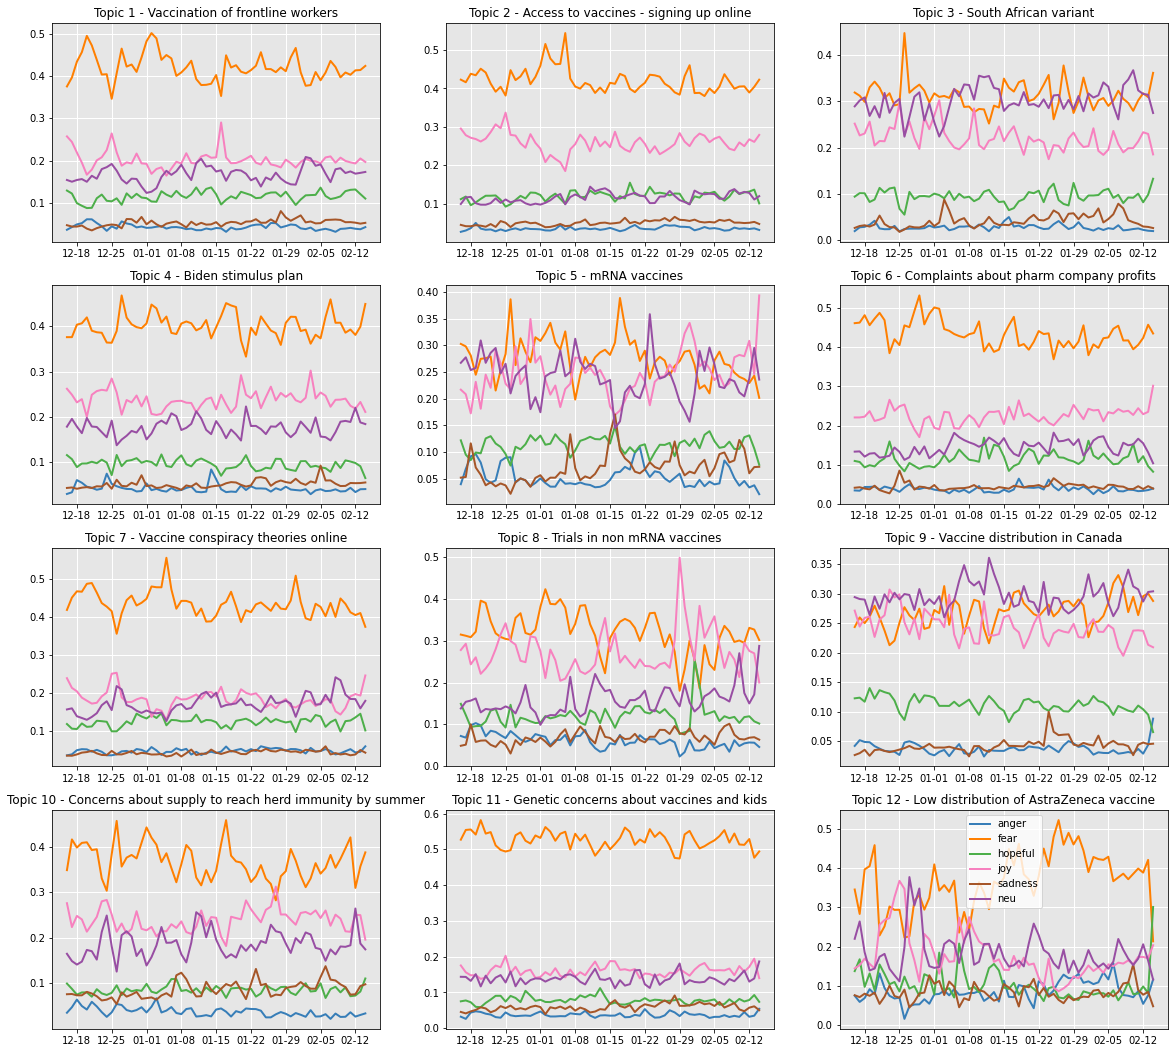

In [29]:
k = 0

fig, axes = plt.subplots(4,3)
fig.set_figheight(18.5)
fig.set_figwidth(20)
plt.rc('axes', prop_cycle=(cycler('color', ['#377eb8', '#ff7f00', '#4daf4a', '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00'])))
for i in axes:
    for j in i:
        j.set_facecolor('#E6E6E6')
        j.grid(color='w', linestyle='-', linewidth=1)
        topic = list(topic_map.keys())[k]
        for col in ['anger', 'fear', 'hopeful', 'joy', 'sadness', 'neu']:
            j.plot(emotion_pivot[(emotion_pivot.date > datetime.date(2020,12,15)) & (emotion_pivot.max_topic == topic)]['date'], 
                   emotion_pivot[(emotion_pivot.max_topic == topic) & (emotion_pivot.date > datetime.date(2020,12,15))][col],
                                                                    linestyle='-', linewidth=2)
            j.title.set_text(topic_map[topic])
            date_form=DateFormatter("%m-%d")
            j.xaxis.set_major_formatter(date_form)
            j.xaxis.set_major_locator(DayLocator(interval=7))
        k = k + 1
plt.legend(['anger', 'fear', 'hopeful', 'joy', 'sadness', 'neu'])
plt.savefig("emotions_total.png")

In [30]:
emotion_total_sample = pivot_data(tweets_all, 'emotion', ['date'])
emotion_total_sample = emotion_total_sample[emotion_total_sample.date > datetime.date(2020,12,15)]

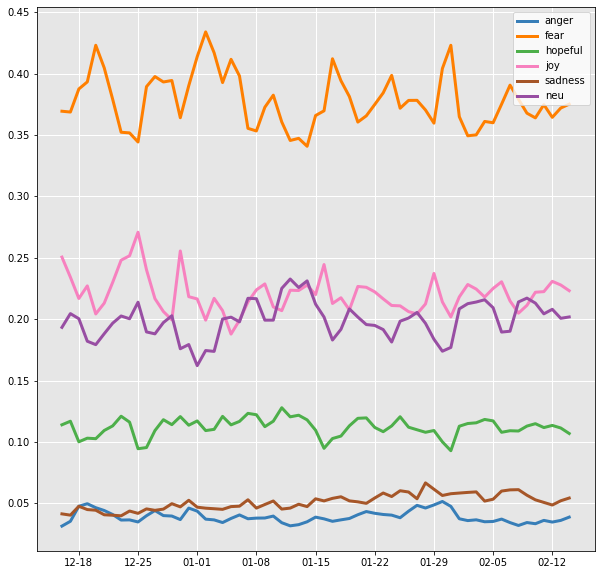

In [31]:
fig, ax = plt.subplots(1,1)
fig.set_figheight(10)
fig.set_figwidth(10)
ax.set_facecolor('#E6E6E6')
ax.grid(color='w', linestyle='-', linewidth=1)
plt.rc('axes', prop_cycle=(cycler('color', ['#377eb8', '#ff7f00', '#4daf4a', '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00'])))
for col in ['anger', 'fear', 'hopeful', 'joy', 'sadness', 'neu']:
    ax.plot(emotion_total_sample['date'], emotion_total_sample[col], linestyle='-', linewidth=3)
    date_form=DateFormatter("%m-%d")
    ax.xaxis.set_major_formatter(date_form)
    ax.xaxis.set_major_locator(DayLocator(interval=7))
plt.legend(['anger', 'fear', 'hopeful', 'joy', 'sadness', 'neu'])
plt.savefig('emotions.png')